<a href="https://colab.research.google.com/github/brkent/SummerStudent2023/blob/main/example08_contour_overlay.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Radio Contours over Optical Images

### [Brian R. Kent](https://www.cv.nrao.edu/~bkent/), National Radio Astronomy Observatory ([NRAO](https://science.nrao.edu/))
@VizAstro on [Twitter](https://www.twitter.com/vizastro), [Instagram](https://www.instagram.com/vizastro), and [YouTube](https://www.youtube.com/user/VisualizeAstronomy).

This notebook shows how to utilize AplPy and AstroQuery to overlay radio images on optical surveys.

Let's examine [NGC 7503](https://ned.ipac.caltech.edu/byname?objname=NGC+7503&hconst=67.8&omegam=0.308&omegav=0.692&wmap=4&corr_z=1)

In [ ]:
!pip install aplpy

In [ ]:
!pip install astroquery

In [ ]:
import os

import aplpy
from astroquery.skyview import SkyView

import numpy as np
import matplotlib.pyplot as plt

from astropy.io import fits
from astropy.wcs import WCS

from astropy.coordinates import SkyCoord
from astropy import units as u
from astropy.nddata import Cutout2D

In [ ]:
position_coord = '23h10m42.00s +07d34m15.7s'
position = SkyCoord(position_coord, frame='icrs')
size = 3.0 * u.arcmin
objname = 'NGC 7503'

radius = size
imagelist = SkyView.get_images(position=objname, radius=radius, pixels=str(int(radius.value*60)),survey=['DSS2 Blue'])
DSS2BLUE_image_hdu = imagelist[0][0]

INFO: Auto-setting vmin to  1.267e+04 [aplpy.core]
INFO: Auto-setting vmax to  2.758e+04 [aplpy.core]


Set OBSGEO-B to    34.078827 from OBSGEO-[XYZ].
Set OBSGEO-H to     2115.607 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to    34.078827 from OBSGEO-[XYZ].
Set OBSGEO-H to     2115.607 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


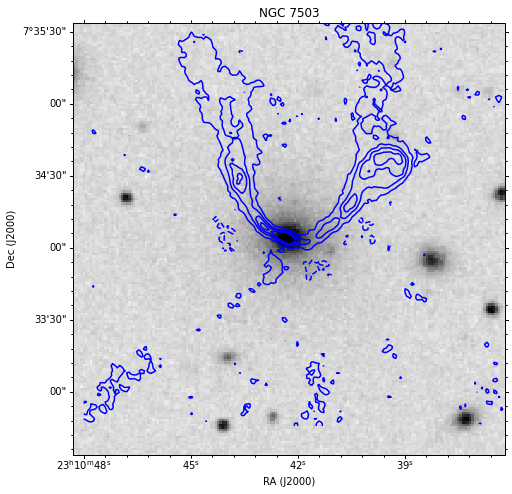

In [ ]:
fig = plt.figure(figsize=(20,6), facecolor='white', edgecolor='black', frameon=True) #, sharey='row')

ax = aplpy.FITSFigure(DSS2BLUE_image_hdu, figure=fig, subplot=[0.45,0.1,0.3,1.0])
ax.show_colorscale(cmap='gray_r')
ax.set_title(objname)


target_url = 'https://archive-new.nrao.edu/vlass/quicklook/VLASS1.1v2/T12t35/VLASS1.1.ql.T12t35.J231013+073000.10.2048.v1/VLASS1.1.ql.T12t35.J231013+073000.10.2048.v1.I.iter1.image.pbcor.tt0.subim.fits'
VLASS_FITS = fits.open(target_url)
wcs = WCS(VLASS_FITS[0].header, naxis=2)
cutout = Cutout2D(VLASS_FITS[0].data[0,0,:,:], position=position, size=size, wcs=wcs)
hdu = fits.PrimaryHDU(cutout.data)
hdu.header.update(cutout.wcs.to_header())

ax.show_contour(hdu, colors='blue', levels=5)

fig.canvas.draw()